**Business Understanding/Requirements**

We need to impolement a Classification Model to predict the default in repayment of a credit card. For this purpose we will mainly look into 3 important questions:

1) How a customer's demography mainly Gender, Education and Marital Status effects the probability of default in repayment ?

2)Is there any relation between customer's age and the repayment habit of the customer?

3)How accurately we can predict the default in repayment?

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importing various libraries for Exploratory Data Analysis. Remaining libraries will be imported as and when necessary.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**DATA Used**

For this purpose we will use the data from [KAGGLE](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) Website. 

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [3]:
path = ('/content/gdrive/MyDrive/Predicting default of credit card/TaiwanCreditDefaults.xls') 

In [4]:
df = pd.read_excel(path, header = 1) #Importing files
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [5]:
df.info() #Information regarding our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Data Preparation and Visualization**

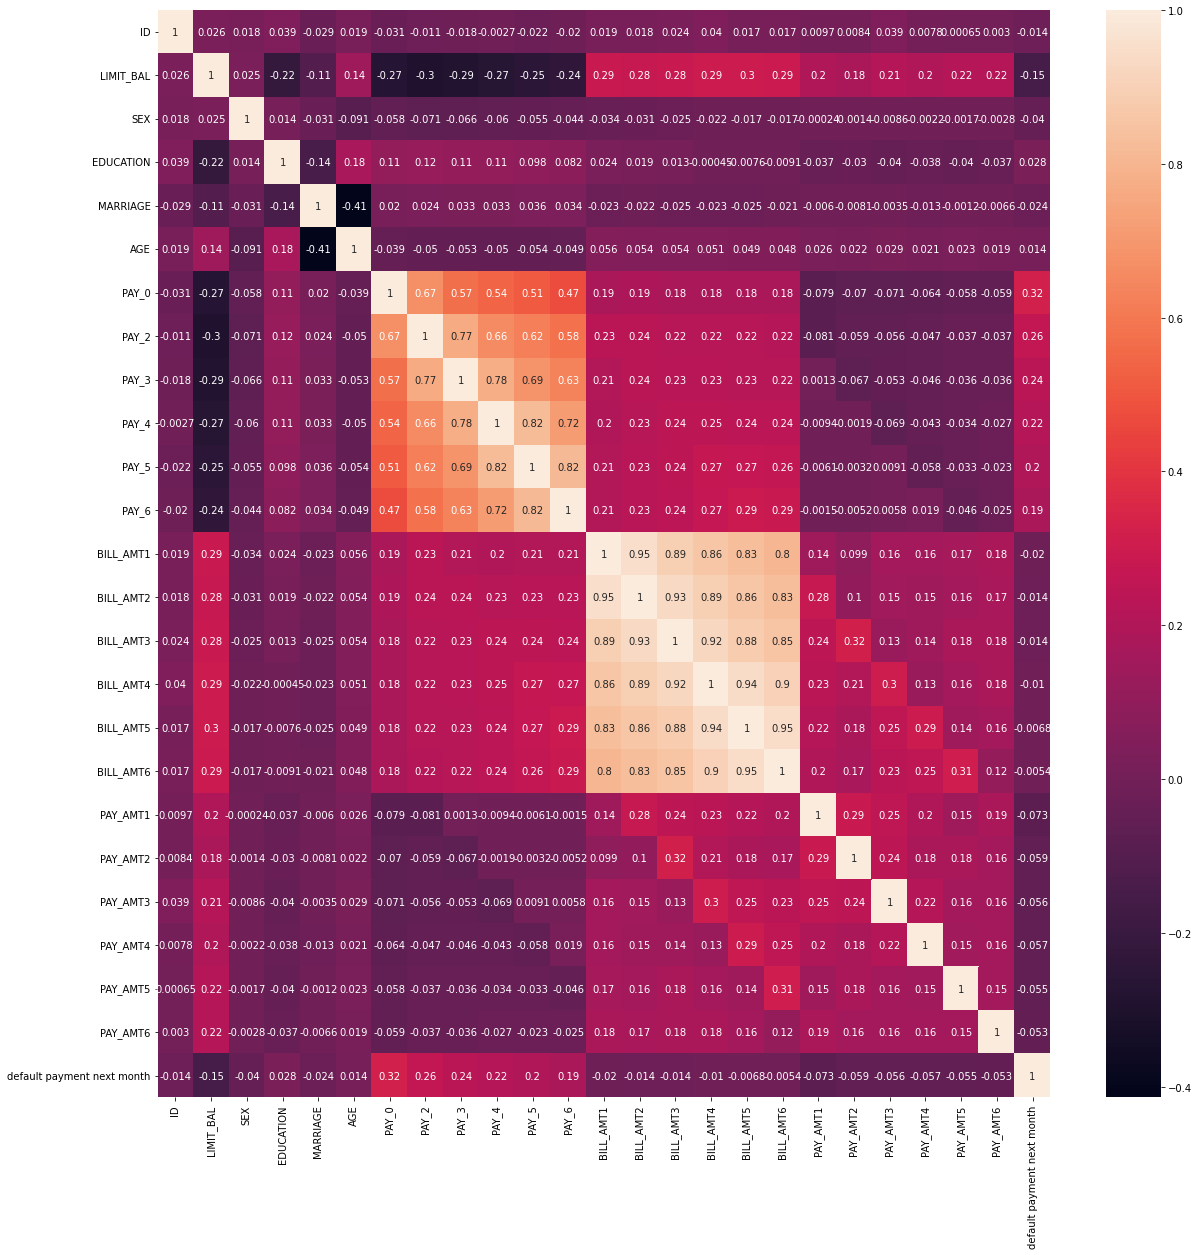

In [6]:
#Lets's see the correlation between various parameters
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

In [7]:
df['default payment next month'].value_counts() #This will give the idea of distribution of our target variable.

0    23364
1     6636
Name: default payment next month, dtype: int64

**Let's find the relationship between the customer who defaults with their Sex,  Marital_Status and Education Level**

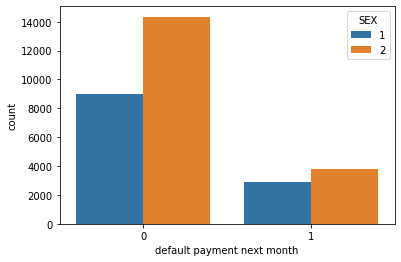

In [8]:
sns.countplot(df['default payment next month'], hue = df['SEX']); 

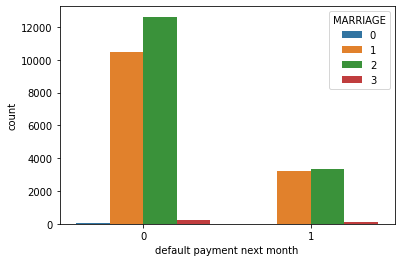

In [9]:
sns.countplot(df['default payment next month'], hue = df['MARRIAGE']);

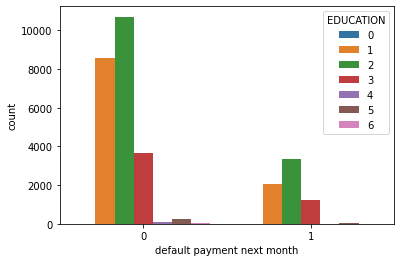

In [10]:
sns.countplot(df['default payment next month'], hue = df['EDUCATION']);

**As we can see from above that there is no definite relationship between the customer's Gender or Edcation level with the probability of their default**

In [11]:
df['Age_Group'] = pd.cut(df['AGE'], [20, 30, 40, 50, 60, 70, 80], 
                         labels = ['20s', '30s', '40s', '50s', '60s', '70s']) 
df['Age_Group'] #Combining age groups to get more insights 

0        20s
1        20s
2        30s
3        30s
4        50s
        ... 
29995    30s
29996    40s
29997    30s
29998    40s
29999    40s
Name: Age_Group, Length: 30000, dtype: category
Categories (6, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s']

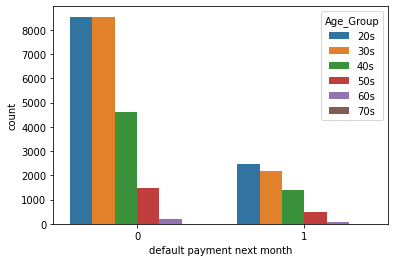

In [12]:
sns.countplot(df['default payment next month'], hue = df['Age_Group']);

**From above, we can see that young customer's in their 20s and 30s are more prone to defaults.**

**MODELING and EVALUATING our DATA**

**Let's fit our data into the model for classification. We will use two algorithms Logistic Regression and Random Forrest and compare their results.**

In [13]:
X = df[['SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] # We have used only those features who have greater correlation with the respose variable 
y = df['default payment next month']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #Splitting the data into Train and Test set.

In [15]:
from sklearn.preprocessing import StandardScaler #Scalling the data as we have many negative values in the data. Standard Scaler will scale the data to have mean = 0 and Standard Deviation = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #fit_transform is used on the training data so that we can scale the training data and also learn the scaling parameters of that data
X_test = sc.transform(X_test) #Only transform is used so as to shield the algorithm from over-fitting 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #Initializing the Algorithm

In [17]:
rf.fit(X_train, y_train) #fitting our data into our model
pred_1 = rf.predict(X_test) #prediticting on test data

In [18]:
from sklearn.metrics import confusion_matrix, classification_report #Importing various metrics for testing efficacy of our model
print ("Confusion Matrix: ", confusion_matrix(y_test, pred_1))
print ("\n")
print ("Classification Report: ", classification_report(y_test, pred_1))

Confusion Matrix:  [[6430  610]
 [1262  698]]


Classification Report:                precision    recall  f1-score   support

           0       0.84      0.91      0.87      7040
           1       0.53      0.36      0.43      1960

    accuracy                           0.79      9000
   macro avg       0.68      0.63      0.65      9000
weighted avg       0.77      0.79      0.78      9000



**We will try to find the best parameters by using Grid
-Search Technique**

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
gsv_rf = GridSearchCV(rf, param_grid = param_grid)
gsv_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)})

In [20]:
pred_2 = gsv_rf.predict(X_test)
print ("Confusion Matrix: ", confusion_matrix(y_test, pred_2))
print ("\n")
print ("Classification Report: ", classification_report(y_test, pred_2))

Confusion Matrix:  [[6707  333]
 [1270  690]]


Classification Report:                precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



**From above we conclude that although Grid Search did improve our result marginally but at the cost of Time**

**Let's Try Logistic Regression alongwith Grid Search Technique**

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred_3 = log_reg.predict(X_test)
print ("Confusion Matrix: ", confusion_matrix(y_test, pred_3))
print ("\n")
print ("Classification Report: ", classification_report(y_test, pred_3))

Confusion Matrix:  [[6860  180]
 [1546  414]]


Classification Report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.70      0.21      0.32      1960

    accuracy                           0.81      9000
   macro avg       0.76      0.59      0.61      9000
weighted avg       0.79      0.81      0.77      9000



In [22]:
 grid_values = {'C': [0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2']}

gsv_lg = GridSearchCV(log_reg, param_grid = grid_values, cv = 5)

In [23]:
gsv_lg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [24]:
pred_4 = gsv_lg.predict(X_test)
print ("Confusion Matrix: ", confusion_matrix(y_test, pred_4))
print ("\n")
print ("Classification Report: ", classification_report(y_test, pred_4))

Confusion Matrix:  [[6860  180]
 [1546  414]]


Classification Report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.70      0.21      0.32      1960

    accuracy                           0.81      9000
   macro avg       0.76      0.59      0.61      9000
weighted avg       0.79      0.81      0.77      9000



**Conclusion**




We can see from our above results that, although the best accuracy has been achieved by Grid Search on Random Forrest classifier but it came at the cost of our resources. Also, Logistic Regression is a simple model with accuracy matching to our Random Forrest model in this case. 


**DEPLOYMENT**

In [25]:
import pickle

saved_model = pickle.dumps(log_reg)# Save the trained model as a pickle string.

log_reg_pickle = pickle.loads(saved_model) # Load the pickled model

#Now the model is ready to deploy 

log_reg_pickle.predict(X_test) # Use the loaded pickled model to make predictions


array([0, 0, 0, ..., 0, 0, 0])